In [35]:
%pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [36]:
import numpy as np
import matplotlib as plt
import cv2

Numer_indeksu % liczba_zdjęć = x

In [37]:
nr_zdj = 335201 % 36
print("numer zdjęcia po losowaniu: ", nr_zdj)

numer zdjęcia po losowaniu:  5


Kernel Size: 3


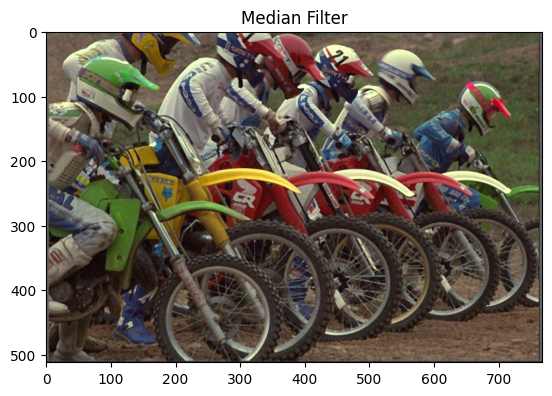

PSNR: 26.83 dB


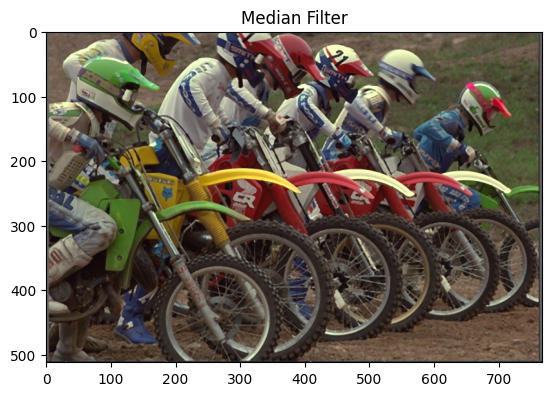

PSNR: 27.29 dB


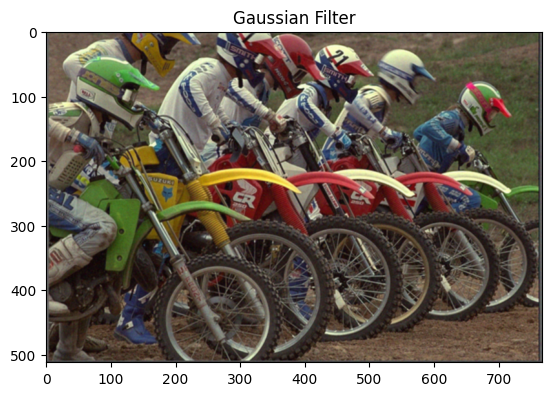

PSNR: 27.41 dB


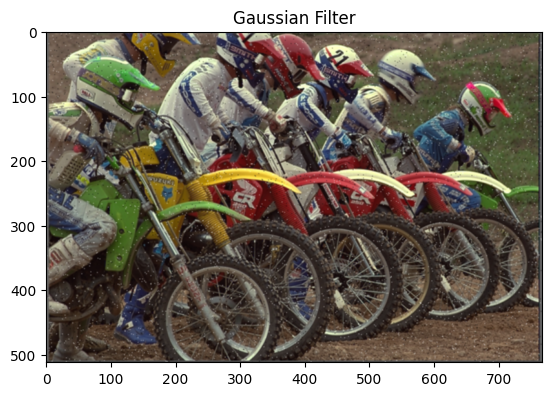

PSNR: 25.86 dB
Kernel Size: 5


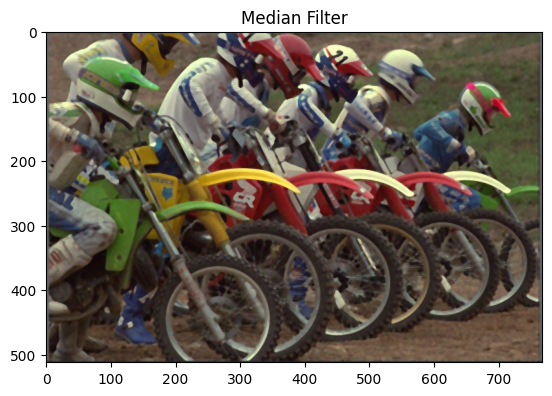

PSNR: 23.23 dB


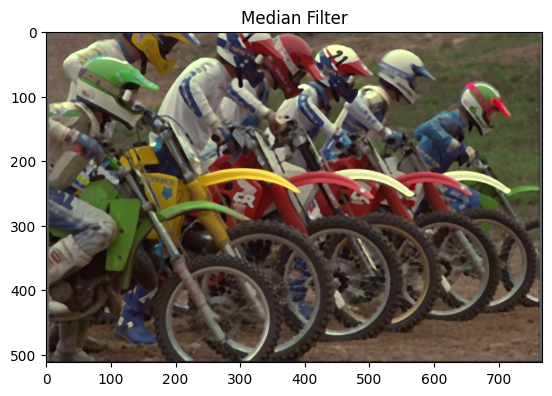

PSNR: 23.32 dB


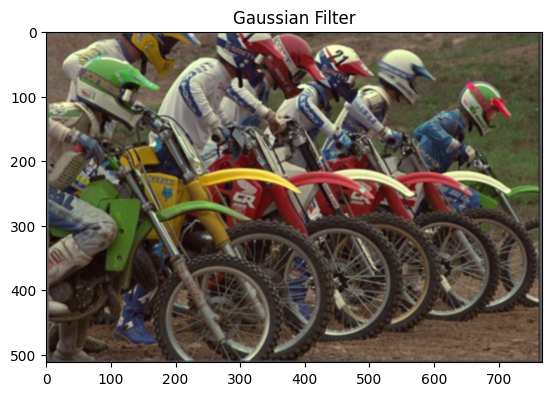

PSNR: 25.05 dB


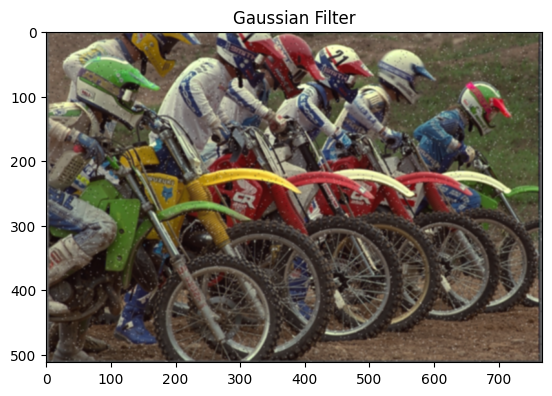

PSNR: 24.46 dB
Kernel Size: 7


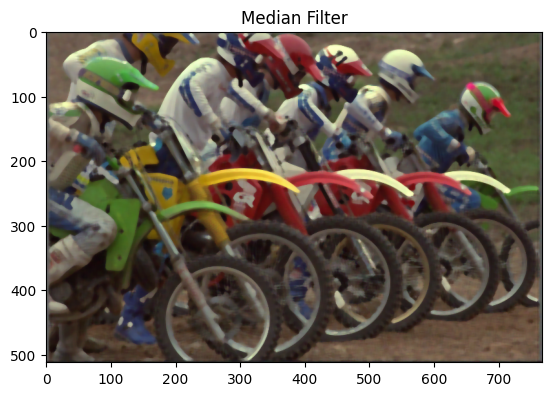

PSNR: 21.82 dB


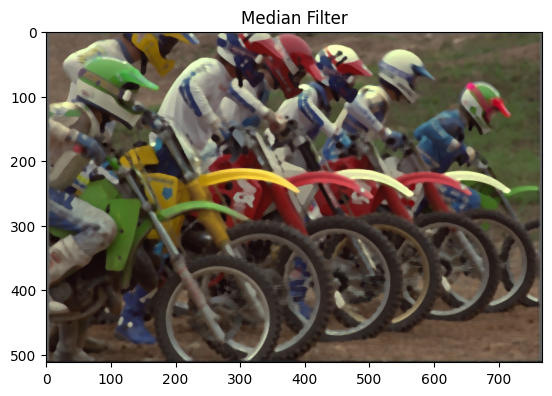

PSNR: 21.86 dB


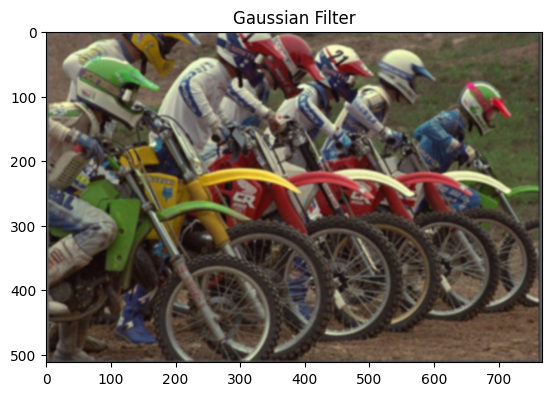

PSNR: 23.27 dB


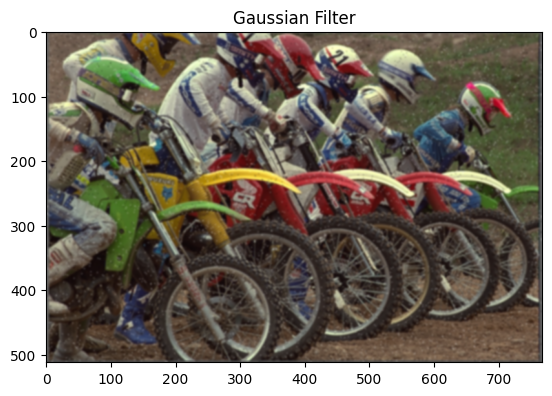

PSNR: 23.01 dB


In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def cv_imshow(img, img_title="image"):
    if (img.dtype == np.float32) or (img.dtype == np.float64):
        img = img / 255
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(img_title)
    plt.show()

def readImages():
    original_image = cv2.imread("../LAB_4/obrazy_testowe/color/bikes_col.png")
    gaussian_noise_image = cv2.imread("../LAB_4/obrazy_testowe/color_noise/bikes_col_noise.png")
    impulse_noise_image = cv2.imread("../LAB_4/obrazy_testowe/color_inoise1/bikes_col_inoise.png")
    return original_image, gaussian_noise_image, impulse_noise_image

def medianFilter(images, kernel_size):
    median_images = []
    for i in range(1, len(images)):
        image = cv2.medianBlur(images[i], kernel_size)
        median_images.append(image)
    return median_images

def gaussianFilter(images, kernel_size):
    gaussian_images = []
    for i in range(1, len(images)):
        image = cv2.GaussianBlur(images[i], (kernel_size, kernel_size), 0)
        gaussian_images.append(image)
    return gaussian_images

def savePhotos(images, save_path, filter_name, kernel_size):
    for index, image in enumerate(images):
        savepath = f"{save_path}{filter_name}_image{index}_{kernel_size}.png"
        cv2.imwrite(savepath, image)

def calcPSNR(img1, img2):
    imax = 255.**2
    mse = ((img1.astype(np.float64) - img2)**2).sum() / img1.size
    return 10.0 * np.log10(imax / mse)

def showImagePSNR(images, title, original_image):
    for image in images:
        cv_imshow(image, title)
        print("PSNR: {:.2f} dB".format(calcPSNR(original_image, image)))

def main():
    kernel_sizes = [3, 5, 7]
    images = readImages()
    out_path = "../LAB_4/results/"

    for kernel_size in kernel_sizes:
        print(f"Kernel Size: {kernel_size}")
        
        median_images = medianFilter(images, kernel_size)
        gaussian_images = gaussianFilter(images, kernel_size)

        showImagePSNR(median_images, "Median Filter", images[0])
        showImagePSNR(gaussian_images, "Gaussian Filter", images[0])

        savePhotos(median_images, out_path, "median", kernel_size)
        savePhotos(gaussian_images, out_path, "gaussian", kernel_size)

main()
